# Hackathon Project - My Analysis of the Netflix Dataset by Nikul 

#### For this hackathon project, in our group we each individually had to analyse the Netflix dataset by preprocessing cleaning and visualising the trends within the dataset. In this analysis I have focused on visualising the total number of movies and tv shows that Netflix streams, how many movies and tv shows are streamed by the top 10 countries in the world and the total percentage of Movies and TV shows streamed by each of the top 10 countries shown by my visualisations.

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
df = Netflix
Netflix = pd.read_csv('/Users/nikulkerai/Desktop/Hackathon/netflix_titles.csv')
Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Preprocessing & Cleaning of the Netflix Dataset

#### The steps I took in order to preprocess and clean the dataset are as follows:

#### 1 - Ensured that the ' date_added' column is in datetime format.
#### 2 - Ensured that the ' release_year' column is in the correct numeric format.
#### 3 - Extracted month and year from the ' date_added' column for time-based analysis.
#### 4 - For numeric columns, filled in missing values with the mean. 
#### 5 - For categorical columns 'rating', 'duration' and 'country', filled in missing values with the mode. 
#### 6 - Standardised capitalisation in categorical columns 'type' and 'rating' for consistency.
#### 7 - Checked for and removed any duplicate entries.
#### 8 - Investigated and handled any outliers in columns.

In [119]:
Netflix.shape

(8807, 12)

In [120]:
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [121]:
Netflix.describe

<bound method NDFrame.describe of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail M

In [122]:

Netflix['date_added'] = pd.to_datetime(Netflix['date_added'], errors='coerce')

print(Netflix.dtypes)


show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object


In [123]:
Netflix['release_year'] = pd.to_numeric(Netflix['release_year'], errors='coerce')
print(Netflix.dtypes)

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object


In [124]:
Netflix['added_month'] = Netflix['date_added'].dt.month
Netflix['added_year'] = Netflix['date_added'].dt.year
print(Netflix[['date_added', 'added_month', 'added_year']].head())

  date_added  added_month  added_year
0 2021-09-25          9.0      2021.0
1 2021-09-24          9.0      2021.0
2 2021-09-24          9.0      2021.0
3 2021-09-24          9.0      2021.0
4 2021-09-24          9.0      2021.0


In [125]:
numeric_cols = Netflix.select_dtypes(include=['number']).columns
Netflix[numeric_cols] = Netflix[numeric_cols].fillna(Netflix[numeric_cols].mean())
print(Netflix.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-0

In [126]:

categorical_cols = ['rating', 'duration', 'country']

for col in categorical_cols:
    if Netflix[col].dtype == 'object':
        Netflix[col] = Netflix[col].fillna(Netflix[col].mode()[0])  

print(Netflix.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                                NaN  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-0

In [127]:

Netflix['type'] = Netflix['type'].str.upper()  
Netflix['rating'] = Netflix['rating'].str.upper()  
print(Netflix[['type', 'rating']].head())


      type rating
0    MOVIE  PG-13
1  TV SHOW  TV-MA
2  TV SHOW  TV-MA
3  TV SHOW  TV-MA
4  TV SHOW  TV-MA


In [128]:

duplicate_rows = Netflix.duplicated()
print("Duplicate rows:")
print(Netflix[duplicate_rows])
Netflix = Netflix.drop_duplicates()

print("DataFrame after removing duplicates:")
print(Netflix.head())


Duplicate rows:
Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description, added_month, added_year]
Index: []
DataFrame after removing duplicates:
  show_id     type                  title         director  \
0      s1    MOVIE   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV SHOW          Blood & Water              NaN   
2      s3  TV SHOW              Ganglands  Julien Leclercq   
3      s4  TV SHOW  Jailbirds New Orleans              NaN   
4      s5  TV SHOW           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                                NaN  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, 

In [129]:

from scipy import stats

numeric_cols = Netflix.select_dtypes(include=['number'])

z_scores = stats.zscore(numeric_cols)

threshold = 3

outlier_rows = (z_scores > threshold).any(axis=1)

Netflix = Netflix[~outlier_rows]

print("DataFrame after removing outliers:")
print(Netflix.head())


DataFrame after removing outliers:
  show_id     type                  title         director  \
0      s1    MOVIE   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV SHOW          Blood & Water              NaN   
2      s3  TV SHOW              Ganglands  Julien Leclercq   
3      s4  TV SHOW  Jailbirds New Orleans              NaN   
4      s5  TV SHOW           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                                NaN  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24         

In [130]:
Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_year
0,s1,MOVIE,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0
1,s2,TV SHOW,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,2021.0
2,s3,TV SHOW,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,2021.0
3,s4,TV SHOW,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,2021.0
4,s5,TV SHOW,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,2021.0


In [131]:
count_types=Netflix['type'].value_counts()
count_types

type
MOVIE      6131
TV SHOW    2676
Name: count, dtype: int64

In [132]:

Netflix['added_month'] = Netflix['added_month'].astype(int)
Netflix['added_year'] = Netflix['added_year'].astype(int)

Netflix.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_year
0,s1,MOVIE,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV SHOW,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV SHOW,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
3,s4,TV SHOW,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV SHOW,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021


In [133]:
Netflix = Netflix[~Netflix['duration'].str.contains('season', case=False)]
Netflix['duration'] = Netflix['duration'].str.extract('(\d+)', expand=False).astype(int)

print(Netflix[['duration']].head())

    duration
0         90
6         91
7        125
9        104
12       127


In [134]:
Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month,added_year
0,s1,MOVIE,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",9,2021
6,s7,MOVIE,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9,2021
7,s8,MOVIE,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9,2021
9,s10,MOVIE,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9,2021
12,s13,MOVIE,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,9,2021


# Visualisations of the Netflix Dataset

#### 1 - Comparison between total number of movies and tv shows on Netflix as a bar chart.

#### 2 - Comparison between top 10 countries and their total number of movies and tv shows on netflix as a bar chart.

#### 3 - Percentage of movies and tv shows streamed by the top 10 countries as a pie chart.

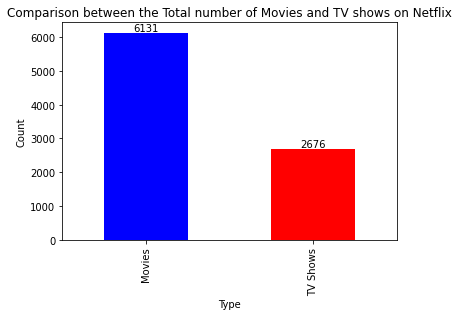

In [135]:
import matplotlib.pyplot as plt
import pandas as pd

count_types = pd.DataFrame({'count_types': [6131, 2676], 'type': ['Movies', 'TV Shows']})

ax = count_types.plot(kind='bar', x='type', y='count_types', color=['blue', 'red'], legend=False)

for i, v in enumerate(count_types['count_types']):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', color='black')

plt.title('Comparison between the Total number of Movies and TV shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


In [136]:
countries = Netflix['country'].value_counts()[:10]
countries

country
United States     2495
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
Name: count, dtype: int64

In [138]:


country_type = df.groupby(['country', 'type']).size().unstack(fill_value=0).reset_index()

country_type['Total'] = country_type['Movie'] + country_type['TV Show']

country_type = country_type[country_type['country'] != 'Not Given']

country_type = country_type.sort_values(by='Total', ascending=False)

colors = ['#0000FF', '#FF0000']

fig = px.bar(country_type.head(10), x='country', y=['Movie', 'TV Show'],
             labels={'value': 'Count', 'variable': 'Type'},
             title='Top 10 Countries and their Streamed Movies and TV Shows',
             barmode='group', 
             color_discrete_map={key: value for key, value in zip(['Movie', 'TV Show'], colors)})

fig.update_traces(marker=dict(line=dict(width=4)),
                  texttemplate='%{y}',  
                  textposition='outside') 

fig.show()


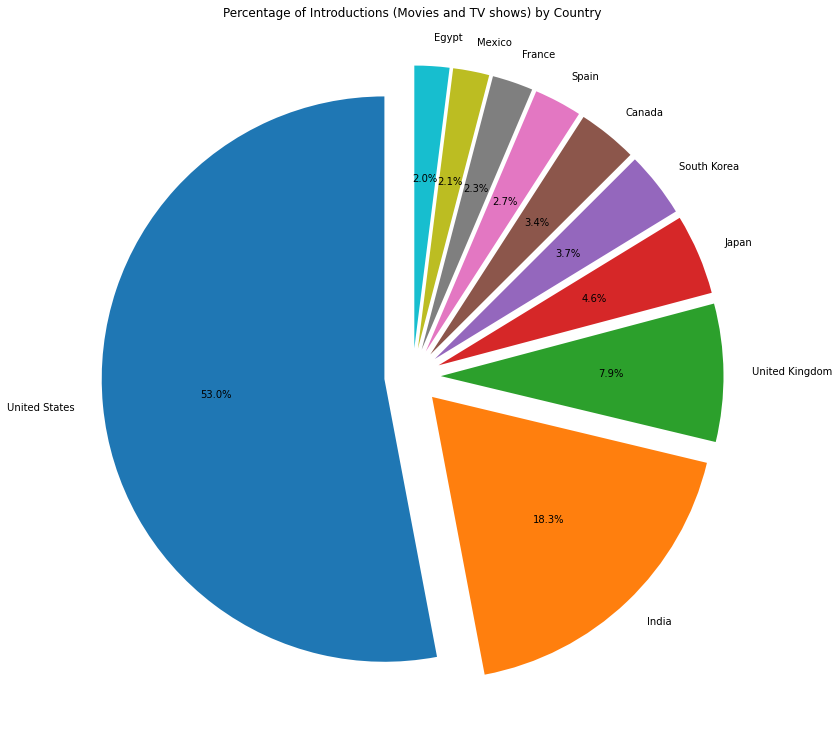

In [ ]:


Netflix = pd.read_csv('/Users/nikulkerai/Desktop/Hackathon/netflix_titles.csv')

intro_by_country = Netflix['country'].value_counts()


top_countries = intro_by_country.head(10)
top_countries

explode_values = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)


plt.figure(figsize=(20, 13))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=90, explode=explode_values)
plt.title('Percentage of Introductions (Movies and TV shows) by Country')
plt.show()
